In [8]:
# Import integrated data
import pandas as pd

df = pd.read_csv('Data/Cleaned/Integrated_data.csv')
df = df[['date', 'weight', 'calories_net']]
# Keep only when calories_net is not null
df = df[df['calories_net'].notnull()]
# date as date
df['date'] = pd.to_datetime(df['date'])

df.head()

,date,weight,calories_net
4,2024-03-16,NaN,117.0
5,2024-03-17,NaN,-204.0
6,2024-03-18,70.5,277.0
7,2024-03-19,NaN,-253.0
8,2024-03-20,NaN,106.0


In [10]:
# Identify the indices where weight is not null
weight_not_null_indices = df[df['weight'].notnull()].index

# Initialize lists to store the results
dates = []
weights = []
days_since_last_weight = []
total_net_calories = []

# Iterate over the indices to calculate the required values
for i in range(1, len(weight_not_null_indices)):
    start_idx = weight_not_null_indices[i - 1]
    end_idx = weight_not_null_indices[i]
    
    # Get the current date and weight
    current_date = df.loc[end_idx, 'date']
    current_weight = df.loc[end_idx, 'weight']
    
    # Calculate the days since last weight
    days_diff = (current_date - df.loc[start_idx, 'date']).days
    
    # Calculate the total net calories since last weight
    calories_sum = df.loc[start_idx + 1:end_idx, 'calories_net'].sum()
    
    # Append the values to the lists
    dates.append(current_date)
    weights.append(current_weight)
    days_since_last_weight.append(days_diff)
    total_net_calories.append(calories_sum)

# Create the output DataFrame
output_df = pd.DataFrame({
    'date': dates,
    'weight': weights,
    'days since last weight': days_since_last_weight,
    'total net calories since then': total_net_calories
})

# Calculate weight variation since last weight
output_df['weight variation'] = output_df['weight'].diff()

output_df


,date,weight,days since last weight,total net calories since then,weight variation
0,2024-03-25,70.45,7,427.0,NaN
1,2024-04-08,69.95,14,-165.0,-0.50
2,2024-04-15,70.05,7,1300.0,0.10
3,2024-04-16,70.65,1,-149.0,0.60
4,2024-04-18,69.65,2,406.0,-1.00
5,2024-04-19,70.15,1,443.0,0.50
6,2024-04-20,69.75,1,233.0,-0.40
7,2024-04-27,71.30,7,570.0,1.55
8,2024-04-29,69.55,2,-332.0,-1.75
9,2024-05-06,69.80,7,1529.0,0.25


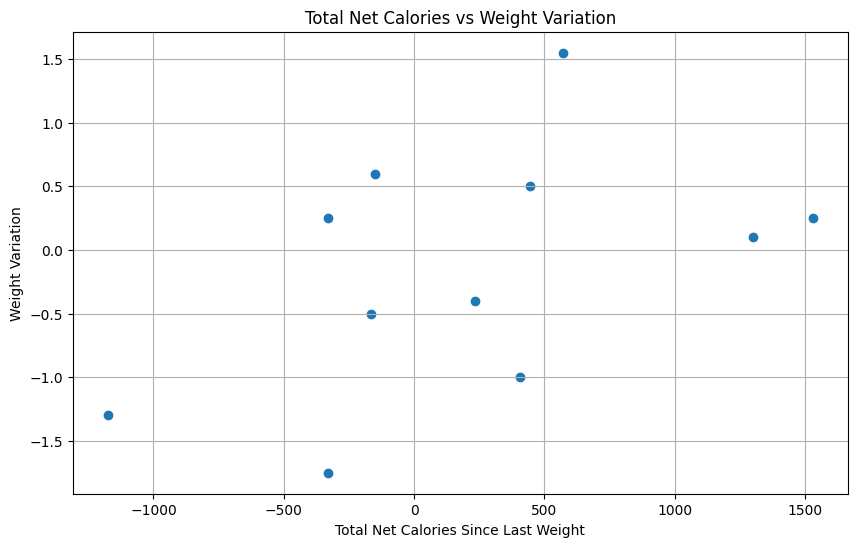

In [12]:
# Plot a cart of net calories vs weight variation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(output_df['total net calories since then'], output_df['weight variation'])
plt.xlabel('Total Net Calories Since Last Weight')
plt.ylabel('Weight Variation')
plt.title('Total Net Calories vs Weight Variation')
plt.grid(True)
plt.show()


In [14]:
import statsmodels.api as sm

# Fit a regression model using statsmodels
X = output_df['total net calories since then']
y = output_df['weight variation']

# Add a constant to the independent variable matrix
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get the predicted values
predictions = model.predict(X)

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(output_df['total net calories since then'], output_df['weight variation'], label='Data Points')
plt.plot(output_df['total net calories since then'], predictions, color='red', label='Regression Line')
plt.xlabel('Total Net Calories Since Last Weight')
plt.ylabel('Weight Variation')
plt.title('Total Net Calories vs Weight Variation')
plt.legend()
plt.grid(True)
plt.show()

# Print the summary of the regression model
print(model.summary())


ModuleNotFoundError: No module named 'statsmodels'